In [13]:

import numpy as np


def load_poses(pose_file):

    # Read and parse the poses
    poses = []
    try:
        with open(pose_file, 'r') as f:
            lines = f.readlines()

            for line in lines:
                T_w_cam0 = np.fromstring(line, dtype=float, sep=' ')
                T_w_cam0 = T_w_cam0.reshape(3, 4)
                T_w_cam0 = np.vstack((T_w_cam0, [0, 0, 0, 1]))
                poses.append(T_w_cam0)

    except FileNotFoundError:
        print('Ground truth poses are not available for sequence.')
        
    return poses

pose_file = "/home/bwshen/data_set/kitti/data_odometry_poses/dataset/poses/10.txt"
poses = load_poses(pose_file) 
for i in range(10):
    print(poses[i])

[[ 1.000000e+00  1.197625e-11  1.704638e-10  1.665335e-16]
 [ 1.197625e-11  1.000000e+00  3.562503e-10 -1.110223e-16]
 [ 1.704638e-10  3.562503e-10  1.000000e+00  2.220446e-16]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
[[ 9.998804e-01  1.381571e-03  1.540756e-02  1.210187e-02]
 [-1.365955e-03  9.999985e-01 -1.023970e-03  4.468736e-04]
 [-1.540895e-02  1.002801e-03  9.998808e-01  1.267281e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
[[ 9.993411e-01  4.139270e-03  3.605873e-02  3.021791e-02]
 [-4.118323e-03  9.999913e-01 -6.552072e-04  9.791738e-04]
 [-3.606113e-02  5.062745e-04  9.993495e-01  2.686230e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
[[ 9.980124e-01  5.708759e-03  6.275818e-02  5.987546e-02]
 [-5.760680e-03  9.999832e-01  6.463838e-04  2.308105e-03]
 [-6.275344e-02 -1.006628e-03  9.980286e-01  4.305403e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
[[ 0.9953527   0.00541158  0.09614398  0.1050408 ]
 

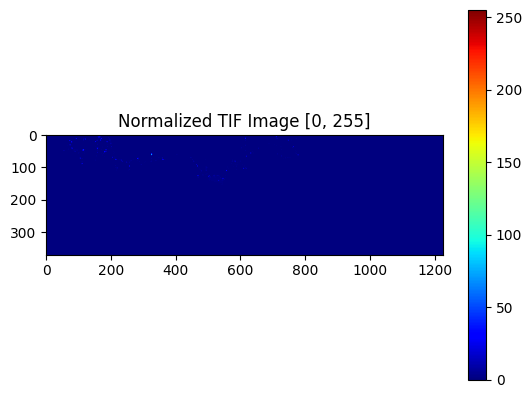

In [15]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np

# 读取 .tif 文件
file_path = '/home/bwshen/depth_ws/src/depth_calculate/test/0000000071_pred.tif'
tif_image = tiff.imread(file_path)

# 归一化到 [0, 255] 范围
# 获取像素最小值和最大值
min_val = np.min(tif_image)
max_val = np.max(tif_image)

# 归一化公式: (x - min) / (max - min) * 255
normalized_image = (tif_image - min_val) / (max_val - min_val) * 255
normalized_image = normalized_image.astype(np.uint16)  # 转换为 8-bit 格式

# 可视化归一化后的图像
plt.imshow(normalized_image, cmap='jet')
plt.colorbar()  # 显示色彩条
plt.title('Normalized TIF Image [0, 255]')
plt.show()